In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import cv2

In [2]:
from google.colab import drive
drive.mount("/content/drive")
folder_path = "/content/drive/My Drive/Colab Notebooks/Research Project/Data/Cropped_faces"

Mounted at /content/drive


80_0_0_20170111222225975.jpg.chip.jpg
['80', '0', '0']
(200, 200, 3)


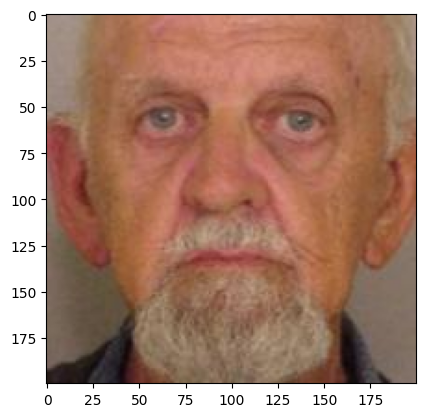

In [3]:
for file in os.listdir(folder_path):
  print(file)
  print(file.split('_')[:-1])

  ## Read the images
  img = cv2.imread(os.path.join(folder_path, file), cv2.IMREAD_COLOR)
  # Convert default BGR format to RGB to use in Matplotlib
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure()
  plt.imshow(img)
  print(img.shape)
  break

In [4]:
folder_path = "/content/drive/My Drive/Colab Notebooks/Research Project/Data/Cropped_faces"

# age: is an integer from 0 to 116, indicating the age
# gender: is either 0 (male) or 1 (female)
# race: is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

column_names = ['Age', 'Gender', 'Race']
records = []

for file in os.listdir(folder_path):
  records.append(file.split('_')[:-1])

DF=pd.DataFrame(records, columns=column_names).dropna().astype(int)
DF.head()

,Age,Gender,Race
0,80,0,0
1,80,0,0
2,80,0,0
3,80,0,0
4,80,0,2


In [5]:
DF.shape

(23725, 3)

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23725 entries, 0 to 23727
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     23725 non-null  int64
 1   Gender  23725 non-null  int64
 2   Race    23725 non-null  int64
dtypes: int64(3)
memory usage: 741.4 KB


## Distribution of gender

Text(0.5, 1.0, 'Distribution of gender in the UTKFace dataset')

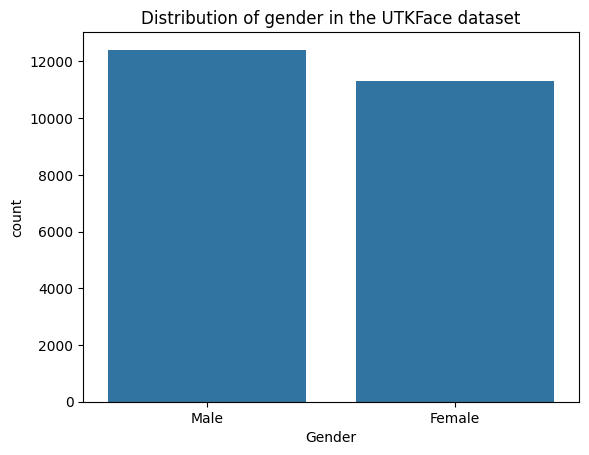

In [12]:
gender_mapping = {
    0: 'Male',
    1: 'Female'
}

DFrame = DF.copy()

# Replace the integers with correct gender
DFrame['Gender'] = DF['Gender'].replace(gender_mapping)

# Count plot
plt.figure()
sns.countplot(x='Gender', data=DFrame)
plt.title('Distribution of gender in the UTKFace dataset')

## Distribution of race

Text(0.5, 1.0, 'Distribution of race in the UTKFace dataset')

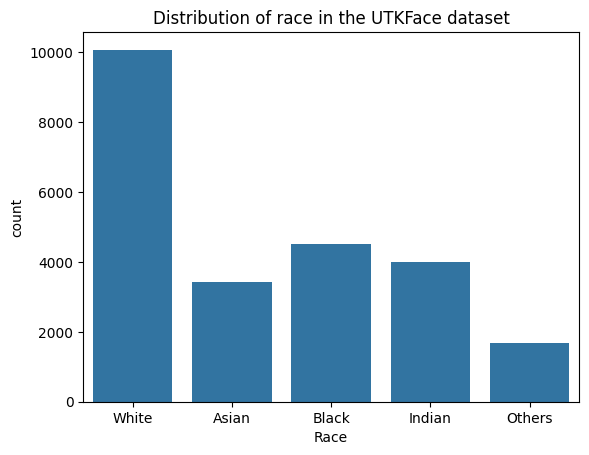

In [15]:
# Race Mapping
race_mapping = {
    0 : 'White',
    1 : 'Black',
    2 : 'Asian',
    3 : 'Indian',
    4 : 'Others'
}

# Replace the integers with correct race
DFrame['Race'] = DFrame['Race'].replace(race_mapping)

# Count plot
plt.figure()
sns.countplot(x='Race', data=DFrame)
plt.title('Distribution of race in the UTKFace dataset')

## Distribution of age

[Text(0, 0, '1'),
 Text(10, 0, '11'),
 Text(20, 0, '21'),
 Text(30, 0, '31'),
 Text(40, 0, '41'),
 Text(50, 0, '51'),
 Text(60, 0, '61'),
 Text(70, 0, '71'),
 Text(80, 0, '81'),
 Text(90, 0, '91'),
 Text(100, 0, '110')]

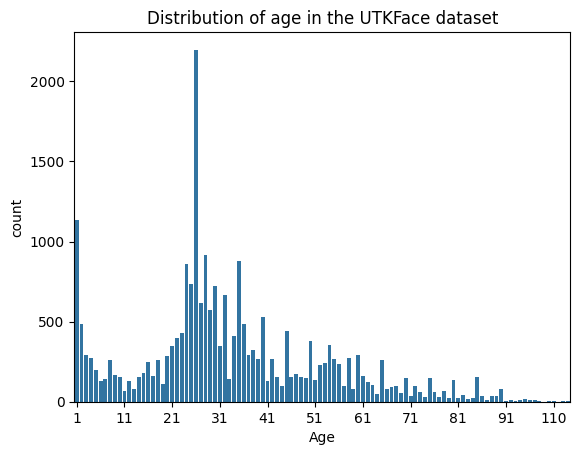

In [18]:
# Count plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.countplot(x='Age', data=DFrame)
plt.title('Distribution of age in the UTKFace dataset')

# Get the current ticks and labels
current_ticks = ax.get_xticks()
current_labels = ax.get_xticklabels()
# Select specific ticks to show every 10th tick
step_size = 10
select_ticks = current_ticks[::step_size]
select_labels = current_labels[::step_size]
# Set the new ticks and labels
ax.set_xticks(select_ticks)
ax.set_xticklabels(select_labels)

## Age distribution by gender

[Text(0, 0, '1'),
 Text(10, 0, '11'),
 Text(20, 0, '21'),
 Text(30, 0, '31'),
 Text(40, 0, '41'),
 Text(50, 0, '51'),
 Text(60, 0, '61'),
 Text(70, 0, '71'),
 Text(80, 0, '81'),
 Text(90, 0, '91'),
 Text(100, 0, '110')]

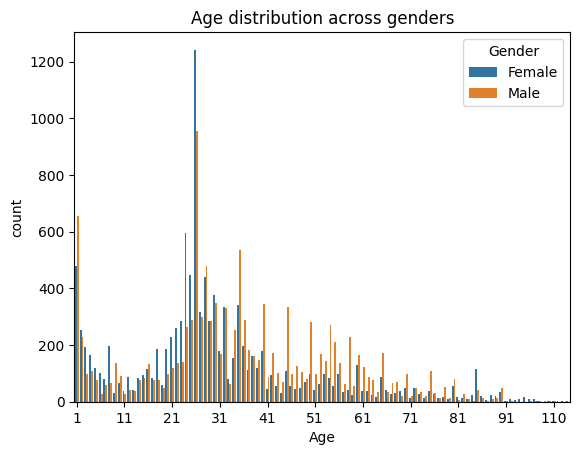

In [21]:
# Count plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.countplot(x='Age', hue='Gender', data=DFrame, ax=ax)
plt.title('Age distribution across genders')

# Get the current ticks and labels
current_ticks = ax.get_xticks()
current_labels = ax.get_xticklabels()
# Select specific ticks to show every 10th tick
step_size = 10
select_ticks = current_ticks[::step_size]
select_labels = current_labels[::step_size]
# Set the new ticks and labels
ax.set_xticks(select_ticks)
ax.set_xticklabels(select_labels)

## Race count by gender

Text(0.5, 1.0, 'Race count by gender')

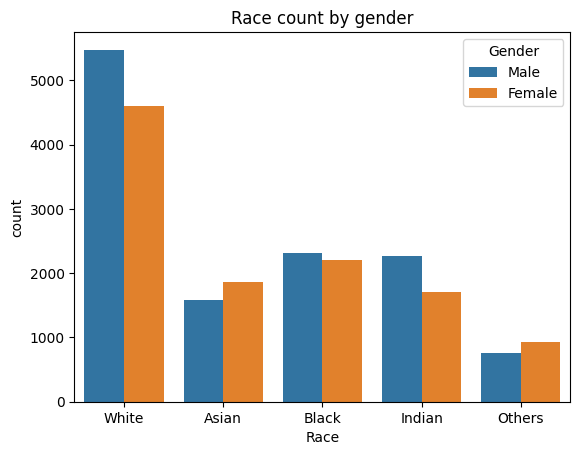

In [22]:
# Count plot
plt.figure()
sns.countplot(x='Race', hue='Gender', data=DFrame)
plt.title('Race count by gender')

## Treemap

In [41]:
# Treemap
import plotly.express as px
fig = px.treemap(DFrame, path=['Gender','Race'], color='Age')
fig.data[0].textinfo = 'label+text+value'
fig.layout.hovermode = False
fig.show()

## Donut chart / Nested pie chart

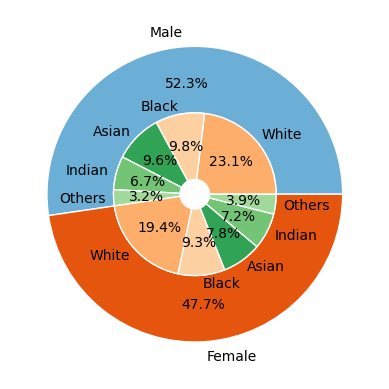

In [27]:
# EDA: Pie chart:
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1,4])
inner_colors = cmap([6,7,8,9,10, 6,7,8,9,10])
size = 0.45
pctdist = 0.75

# Counts all the people travelling in the spaceship
DF_tot = DFrame['Gender'].value_counts()

# Outer pie chart (to show distribution of age variable)
ax.pie(
    np.array(DF_tot),
    autopct='%1.1f%%',
    pctdistance = pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Male', 'Female']    #[0, 1]
     #[df_tot.index[0],df_tot.index[1]]  #[True, False]
);

# Counts of races in females
DF_F = DFrame.Race[DFrame['Gender']=='Female'].value_counts()

# Counts of races in males
DF_M = DFrame.Race[DFrame['Gender']=='Male'].value_counts()

# Concatenate arrays, for use in inner pie chart
concat_arrays= np.concatenate((np.array(DF_M), np.array(DF_F)))  #T, F

# Inner pie chart (to show sub-distribution of "race")
ax.pie(
    concat_arrays,
    autopct='%1.1f%%',
    radius=1.0-size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    #labels=['0','4','0']
    labels=['White','Black','Asian','Indian', 'Others',
            'White','Black','Asian','Indian', 'Others',]   #White, Black, Asian, Indian, and Others
);

## Distribution of age by gender across races

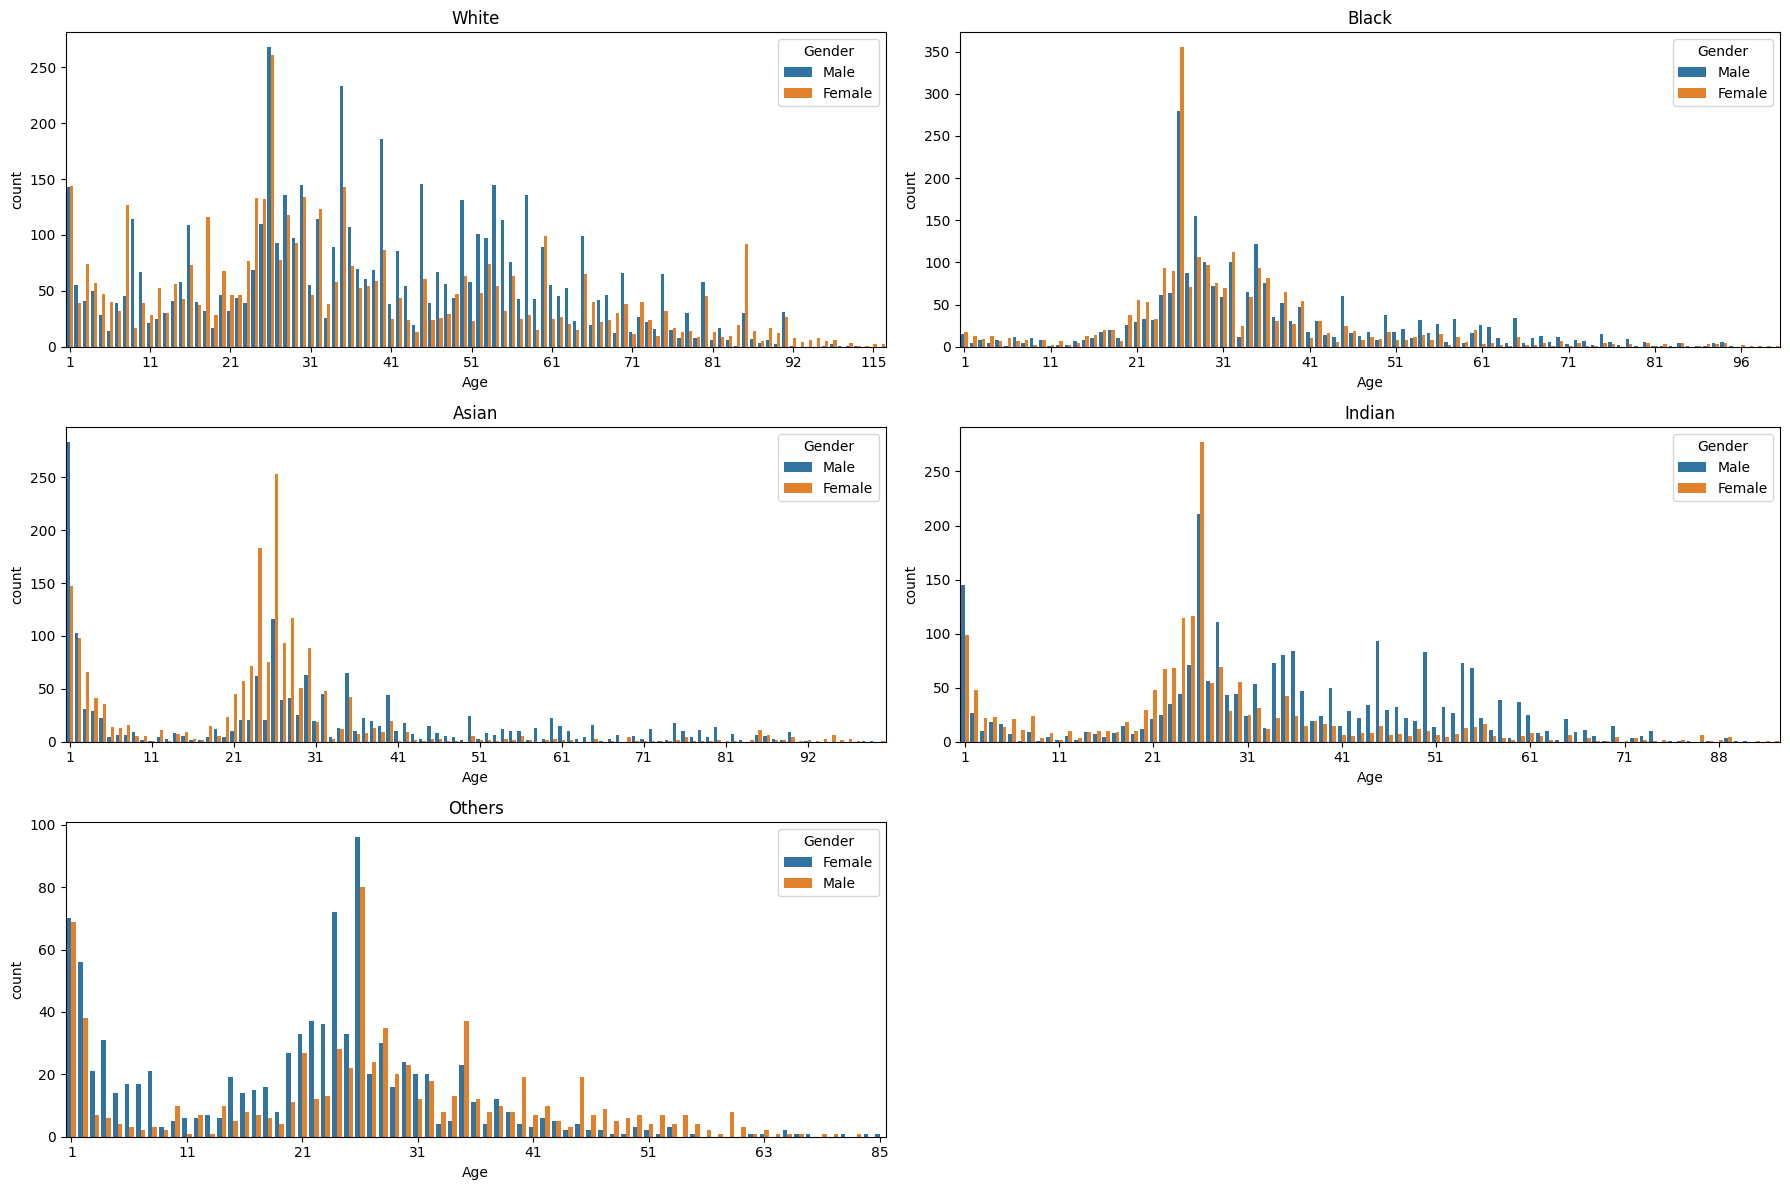

In [40]:
DF_white = DFrame[DFrame['Race']=='White']
DF_black = DFrame[DFrame['Race']=='Black']
DF_asian = DFrame[DFrame['Race']=='Asian']
DF_indian = DFrame[DFrame['Race']=='Indian']
DF_others = DFrame[DFrame['Race']=='Others']

fig, axs = plt.subplots(3,2, figsize=(18,12))
sns.countplot(x='Age', hue='Gender', data=DF_white, ax=axs[0,0])
axs[0,0].set_title('White')
sns.countplot(x='Age', hue='Gender', data=DF_black, ax=axs[0,1])
axs[0,1].set_title('Black')
sns.countplot(x='Age', hue='Gender', data=DF_asian, ax=axs[1,0])
axs[1,0].set_title('Asian')
sns.countplot(x='Age', hue='Gender', data=DF_indian, ax=axs[1,1])
axs[1,1].set_title('Indian')
sns.countplot(x='Age', hue='Gender', data=DF_others, ax=axs[2,0])
axs[2,0].set_title('Others')

def customize_xticks(ax, step_size):
  # Get the current ticks and labels
  current_ticks = ax.get_xticks()
  current_labels = ax.get_xticklabels()
  # Select specific ticks to show every 10th tick
  select_ticks = current_ticks[::step_size]
  select_labels = current_labels[::step_size]
  # Set the new ticks and labels
  ax.set_xticks(select_ticks)
  ax.set_xticklabels(select_labels)

customize_xticks(axs[0,0], 10)
customize_xticks(axs[0,1], 10)
customize_xticks(axs[1,0], 10)
customize_xticks(axs[1,1], 10)
customize_xticks(axs[2,0], 10)

# Remove subplot (2,2) which is the last plot
fig.delaxes(axs[2, 1])

# Adjustint layout to ensure everything fits well
plt.tight_layout()

## Density of age by gender across races (treating age as a continuous variable)
These density curves are obtained treating age as a continuous variable.

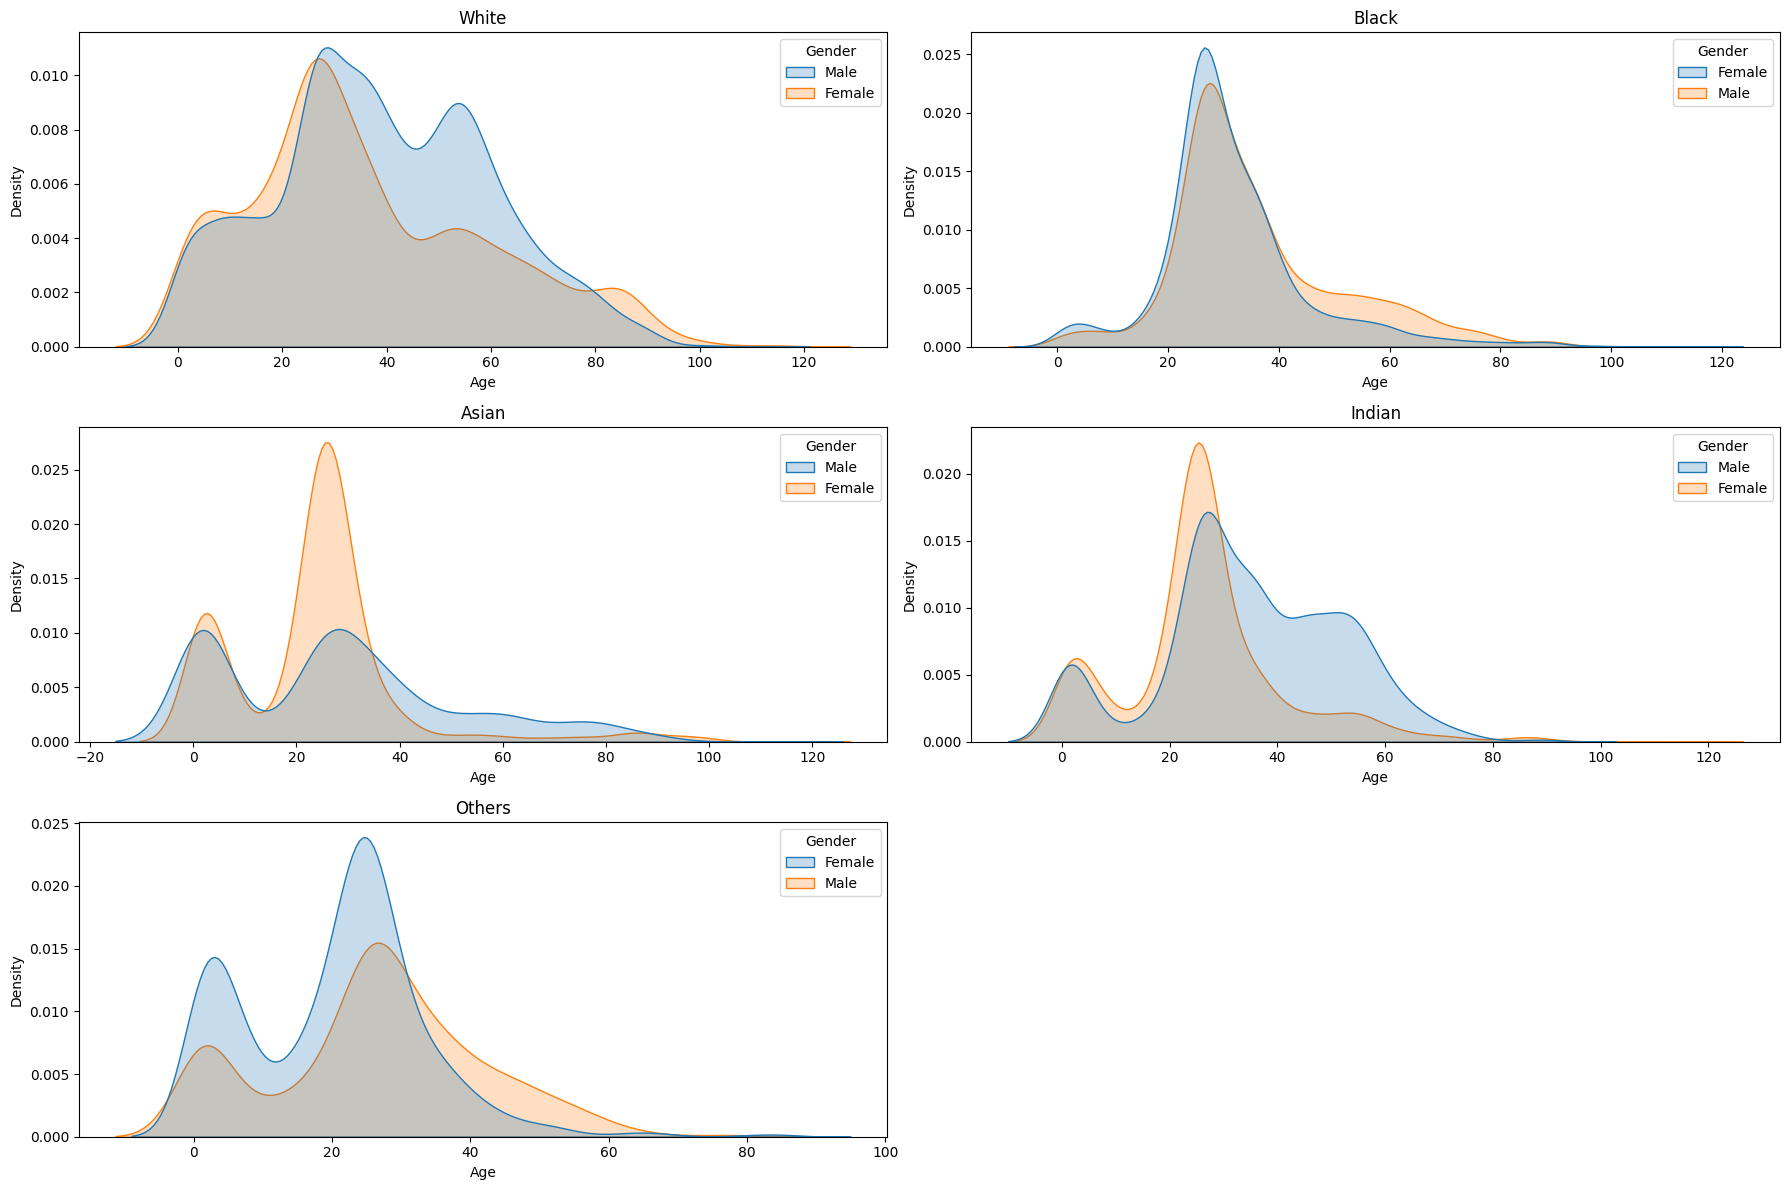

In [39]:
fig, axs = plt.subplots(3,2, figsize=(18,12))
sns.kdeplot(x='Age', hue='Gender', fill=True, data=DF_white, ax=axs[0,0])
axs[0,0].set_title('White')
sns.kdeplot(x='Age', hue='Gender', fill=True, data=DF_black, ax=axs[0,1])
axs[0,1].set_title('Black')
sns.kdeplot(x='Age', hue='Gender', fill=True, data=DF_asian, ax=axs[1,0])
axs[1,0].set_title('Asian')
sns.kdeplot(x='Age', hue='Gender', fill=True, data=DF_indian, ax=axs[1,1])
axs[1,1].set_title('Indian')
sns.kdeplot(x='Age', hue='Gender', fill=True, data=DF_others, ax=axs[2,0])
axs[2,0].set_title('Others')

# Remove subplot (2,2) which is the last plot
fig.delaxes(axs[2, 1])

# Adjustint layout to ensure everything fits well
plt.tight_layout()